## Prediting Employee Attrition Based on Work Conditions - Comparing Logistic Regression, KNN, and Random Forest 


#### Employee attrition can profoundly affect businesses, with short and long-term repercussions. It incurs costs, dampens morale, hampers operational efficiency, and undermines long-term competitiveness. This research seeks to develop an employe attrition prediction model.

#### Import and process data: 

In [41]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
sns.set()

In [42]:
pd.set_option('display.max_columns',None)
raw_data = pd.read_csv('C:/D/Data Science/Kaggle_Binary Classification with a Tabular Employee Attrition Dataset/train.csv')
raw_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [43]:
# Convert selected object variables to integer data type: 
data = raw_data
data['JobRole_Sales Representative'] = (raw_data['JobRole']== 'Sales Representative').astype(int)
data['Travel_Frequently'] = (raw_data['BusinessTravel']=='Travel_Frequently').astype(int)
data['Gender'] = (raw_data['Gender']=='Male').astype(int)
data['Department_RD'] = (raw_data['Department']== 'Research & Development').astype(int)
data['Department_Sales'] = (raw_data['Department']== 'Sales').astype(int)
data['OverTime'] = (data['OverTime'] == 'Yes').astype(int)
data.head()                                                                                                           

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,1,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,1,13,3,2,80,1,10,2,3,10,0,7,8,0,0,1,1,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,1,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,0,17,3,4,80,1,4,3,3,4,2,0,3,0,1,0,0,1
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,1,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,0,17,3,4,80,2,4,3,3,3,2,1,2,0,0,0,0,1
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,0,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,0,14,3,3,80,0,15,1,1,6,0,0,2,0,0,0,1,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,0,37,3,5,Manager,1,Single,19033,19805,1,Y,1,13,3,3,80,0,31,0,3,31,14,4,10,1,0,0,1,0


In [44]:
data.describe()
data_num = data

#### Generate a heatmap to visualize the correlation between employee attrition and predictor variables:

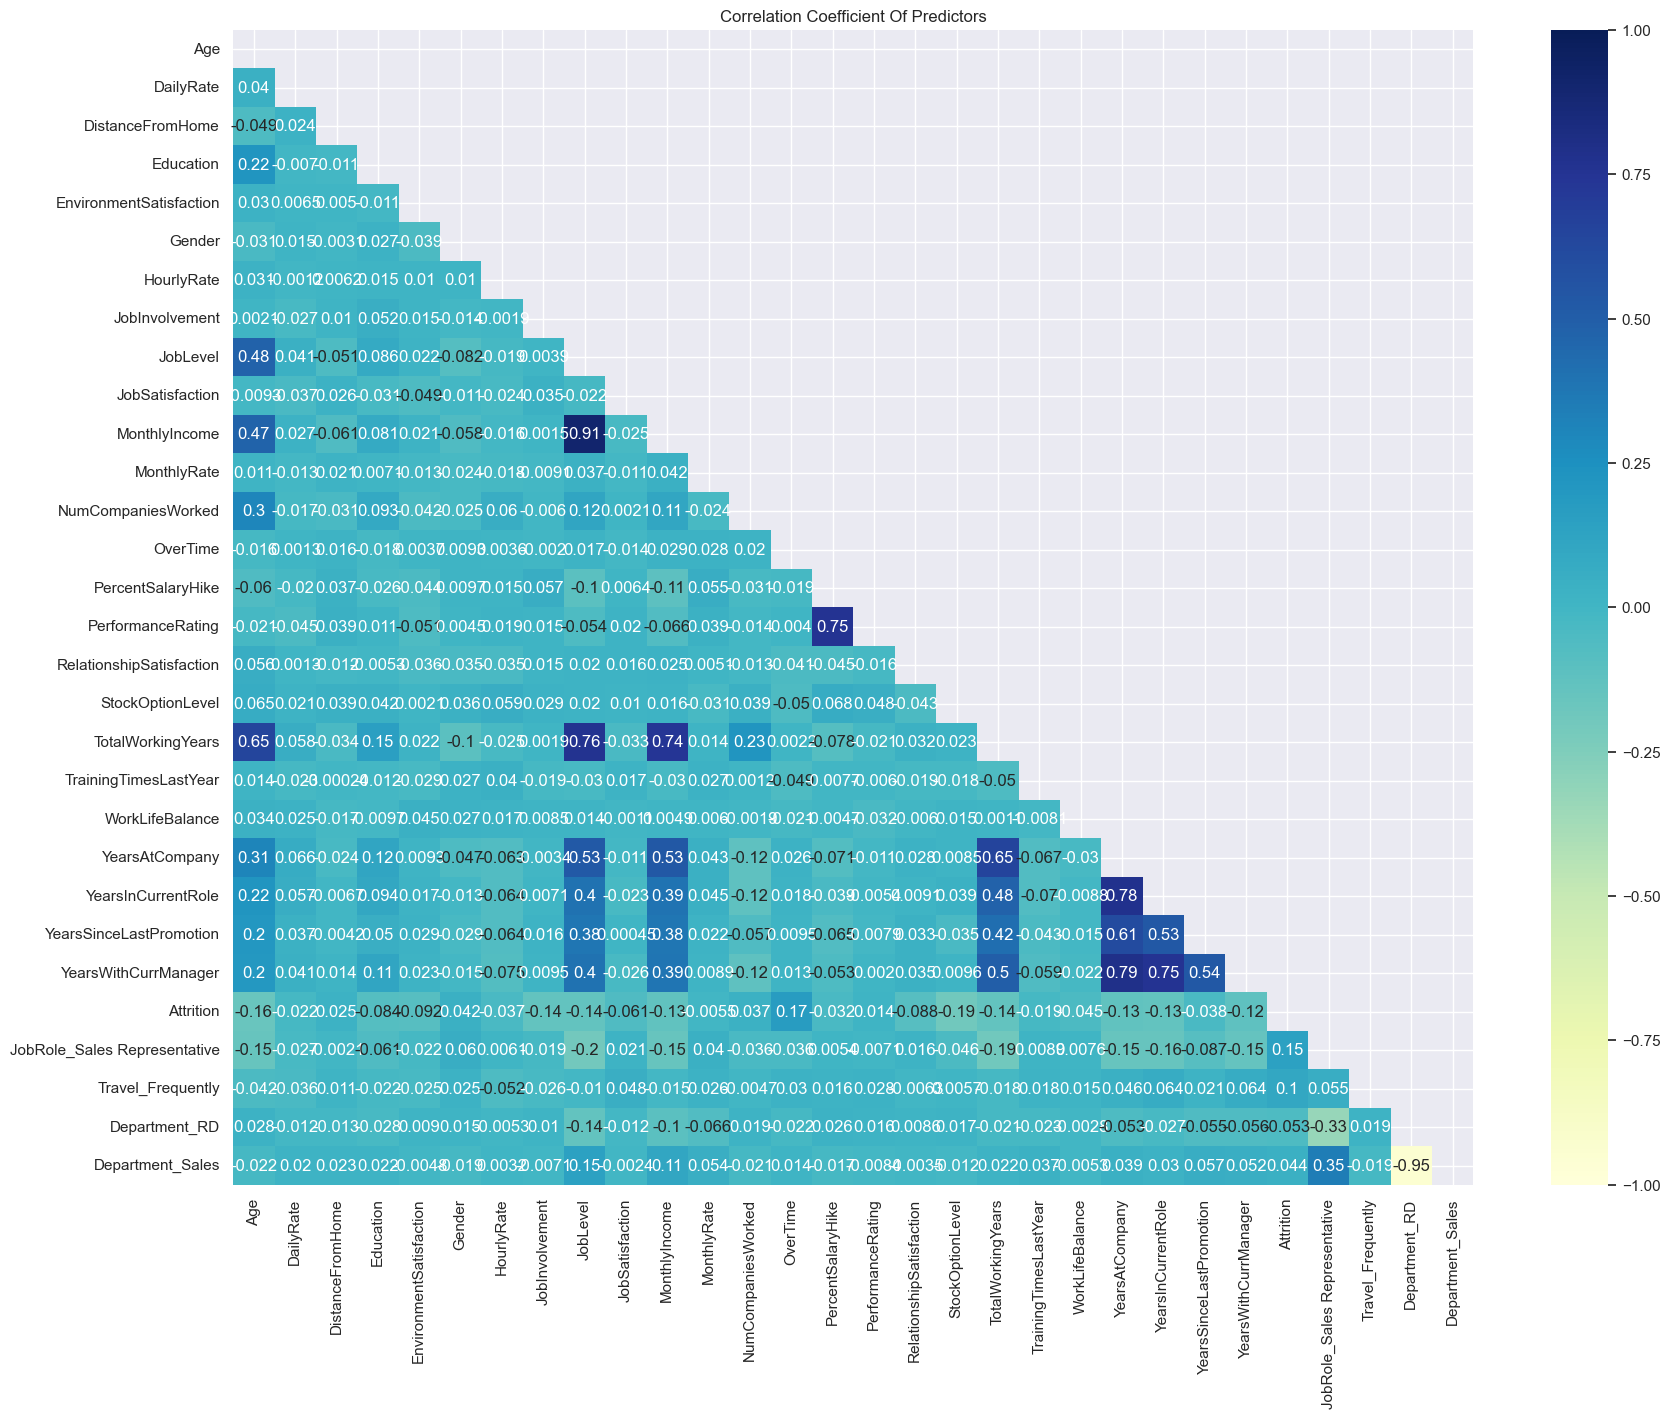

In [45]:
# Set figure size
plt.figure(figsize=(20,15))

# Drop the selected variables from the heatmap   
data_num = data.select_dtypes(exclude=['object'])
data_num = data_num.drop("EmployeeCount",axis=1)
data_num = data_num.drop("StandardHours",axis=1)
data_num = data_num.drop("id",axis=1)
        
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))

# Generate the heatmap
sns.heatmap(data_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

#### Predictive variables: 

In [46]:
data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,36,599,24,3,4,1,42,3,1,4,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0,0,1,1,0
1,35,921,8,3,1,1,46,3,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0,1,0,0,1
2,32,718,26,3,3,1,80,3,2,4,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0,0,0,0,1
3,38,1488,2,3,3,0,40,3,2,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0,0,0,1,0
4,50,1017,5,4,2,0,37,3,5,1,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1,0,0,1,0


In [47]:
Y = data_num['Attrition']
X = data_num[['JobLevel','JobSatisfaction','MonthlyIncome','OverTime','YearsInCurrentRole','JobInvolvement','StockOptionLevel','JobRole_Sales Representative','Travel_Frequently']]

In [48]:
X.head()

,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,YearsInCurrentRole,JobInvolvement,StockOptionLevel,JobRole_Sales Representative,Travel_Frequently
0,1,4,2596,1,0,3,1,0,1
1,1,1,2899,0,2,3,1,1,0
2,2,4,4627,0,2,3,2,0,0
3,2,1,5347,0,0,3,0,0,0
4,5,1,19033,1,14,3,0,0,0


In [49]:
# Data split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Logistic Regression 

In [50]:
# Generate Logistic Regression using sklearn
Model1 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,Y_train)

In [51]:
# Generate the predicted Y
y_pred1 = Model1.predict(X_test)

In [52]:
# display confusion matrix
print(confusion_matrix(Y_test, y_pred1))
 
# display accuracy
print(accuracy_score(Y_test, y_pred1))

[[375   3]
 [ 41   1]]
0.8952380952380953


In [53]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       378
           1       0.25      0.02      0.04        42

    accuracy                           0.90       420
   macro avg       0.58      0.51      0.49       420
weighted avg       0.84      0.90      0.85       420



In [54]:
Model1.score(X_train,Y_train)

0.8806682577565632

In [55]:
Model1.score(X_test,Y_test)

0.8952380952380953

In [56]:
Model1.coef_

array([[-2.48329441e-01, -1.88444967e-01, -5.11999322e-06,
         1.01909837e+00, -8.98403335e-02, -2.50766389e-01,
        -1.15417711e+00,  4.73161837e-01,  6.47328418e-01]])

### K-nearest Neighbors (KNN)

In [57]:
# Import libraries 
from sklearn.neighbors import KNeighborsClassifier

# Generate KNN 
Model2 = KNeighborsClassifier()
Model2.fit(X_train,Y_train)
Model2.score(X_test,Y_test)

0.8857142857142857

In [58]:
y_pred2 = Model2.predict(X_test)

In [59]:
# display confusion matrix
print(confusion_matrix(Y_test, y_pred2))

# display accuracy
print(accuracy_score(Y_test, y_pred2))

[[368  10]
 [ 38   4]]
0.8857142857142857


In [60]:
# Print Classification report
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       378
           1       0.29      0.10      0.14        42

    accuracy                           0.89       420
   macro avg       0.60      0.53      0.54       420
weighted avg       0.84      0.89      0.86       420



### Random Forest

In [61]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

# Generate Random Forest Classifier
Model3 = RandomForestClassifier(n_estimators = 100) 
Model3.fit(X_train, Y_train)  

RandomForestClassifier()

In [62]:
y_pred3 = Model3.predict(X_test)

In [63]:
# display confusion matrix
print(confusion_matrix(Y_test, y_pred3))

# display accuracy
print(accuracy_score(Y_test, y_pred3))

[[369   9]
 [ 33   9]]
0.9


In [64]:
print(classification_report(Y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       378
           1       0.50      0.21      0.30        42

    accuracy                           0.90       420
   macro avg       0.71      0.60      0.62       420
weighted avg       0.88      0.90      0.88       420



### Evaluating the models - accuracy and f1-score for imbalanced dataset

In [65]:
from sklearn.metrics import accuracy_score, f1_score

Models = [Model1, Model2, Model3]
y_pred = [y_pred1, y_pred2, y_pred3]

for i, Model in enumerate(Models):
    accuracy = accuracy_score( Y_test, y_pred[i])
    weighted_f1 = f1_score(Y_test, y_pred[i], average='weighted')
    print(f"Model {i+1}:")
    print(f"Accuracy Score: {accuracy}")
    print(f"Weighted F1-score: {weighted_f1}")
    print()

Model 1:
Accuracy Score: 0.8952380952380953
Weighted F1-score: 0.8544737706713394

Model 2:
Accuracy Score: 0.8857142857142857
Weighted F1-score: 0.8591836734693877

Model 3:
Accuracy Score: 0.9
Weighted F1-score: 0.8815384615384615



#### The logistic regression analysis reveals significant effects of predictor variables on employee attrition. Specifically:

#### 1. Higher salaries and stock options significantly motivate employees, leading to lower turnover rates. Increased pay and stock benefits often result in greater employee loyalty to their organization.
#### 2. Work-life balance is a key motivator for employees, who may otherwise seek better opportunities due to overtime and a lack of balance.
#### 3. High job and environment satisfaction breed loyalty, a crucial asset for any organization. Conversely, dissatisfaction with projects often leads to higher turnover.
#### 4. People often switch jobs early in their careers, seeking stability later. Once established, they tend to stay longer in the same organization.


#### Based on accuracy and weighted f1-score, all three models effectively predicted employee attrition based on the given work conditions features. However, theaccuracy and higher f1-score for the Random Forest model suggests it performed better in this research. 